In [1]:
import pandas as pd

# Load the dataset
ev_data = pd.read_csv("/content/Electric_Vehicle_Population_Data.csv")  # Replace 'ev_dataset.csv' with your actual file name

# Display basic information about the dataset
print(ev_data.info())

# Display summary statistics
print(ev_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         12261 non-null  object 
 1   County                                             12260 non-null  object 
 2   City                                               12260 non-null  object 
 3   State                                              12261 non-null  object 
 4   Postal Code                                        12260 non-null  float64
 5   Model Year                                         12261 non-null  int64  
 6   Make                                               12261 non-null  object 
 7   Model                                              12241 non-null  object 
 8   Electric Vehicle Type                              12261 non-null  object 
 9   Clean 

In [2]:
# Handle missing values
ev_data = ev_data.dropna()  # Remove rows with missing values

# Convert categorical variables to numerical (if needed)
# Example: ev_data['fuel_type'] = pd.get_dummies(ev_data['fuel_type'])


In [3]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12234 entries, 0 to 12259
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         12234 non-null  object 
 1   County                                             12234 non-null  object 
 2   City                                               12234 non-null  object 
 3   State                                              12234 non-null  object 
 4   Postal Code                                        12234 non-null  float64
 5   Model Year                                         12234 non-null  int64  
 6   Make                                               12234 non-null  object 
 7   Model                                              12234 non-null  object 
 8   Electric Vehicle Type                              12234 non-null  object 
 9   Clean 

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for segmentation
features_for_segmentation_third = ev_data[['Electric Range', 'Base MSRP', 'Legislative District']]

# Handle categorical variables if any
# Example: features_for_segmentation_third = pd.get_dummies(features_for_segmentation_third, columns=['Electric Utility'], drop_first=True)

# Standardize features if necessary
features_for_segmentation_third = StandardScaler().fit_transform(features_for_segmentation_third)

# Apply KMeans clustering
kmeans_third = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
ev_data['segment'] = kmeans_third.fit_predict(features_for_segmentation_third)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


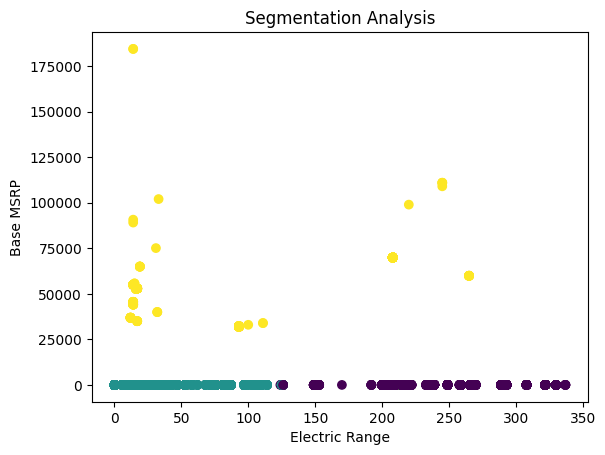

In [7]:
import matplotlib.pyplot as plt

# Visualize the clusters for the third dataset
plt.scatter(ev_data['Electric Range'], ev_data['Base MSRP'], c=ev_data['segment'], cmap='viridis')
plt.title('Segmentation Analysis')
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.show()


<ipython-input-8-183dd366b517>:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


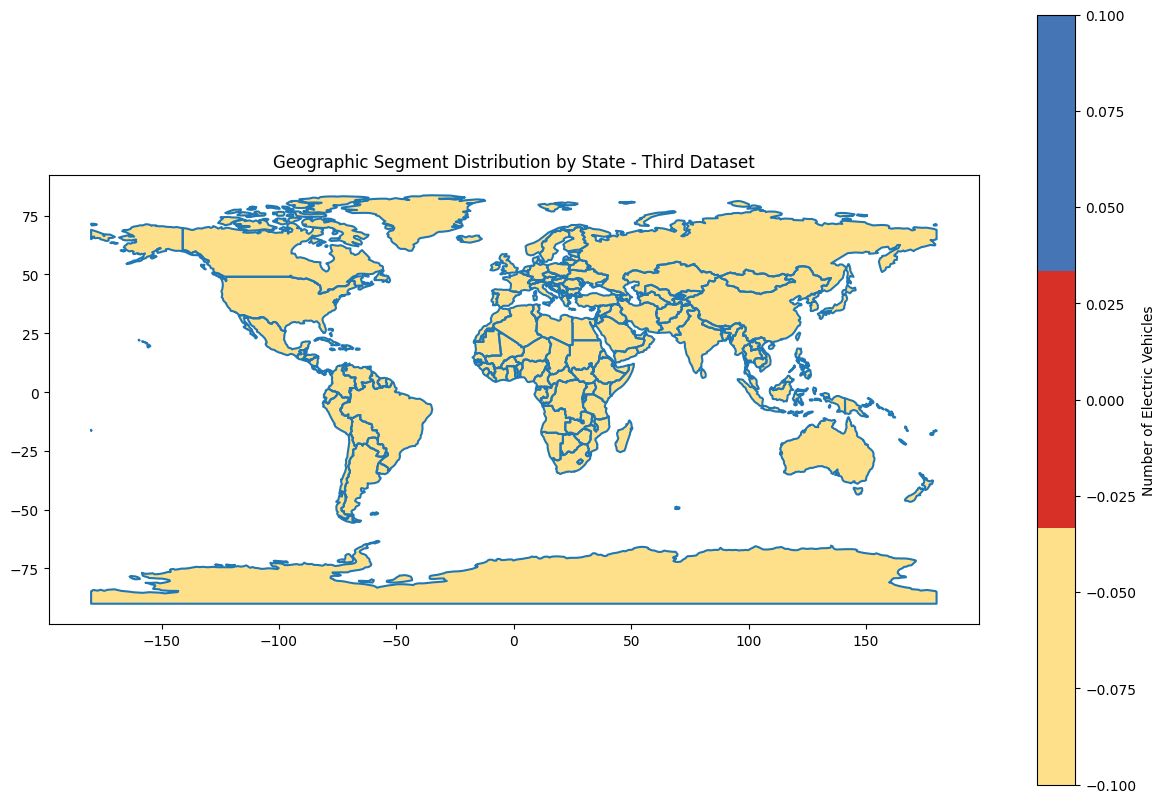

In [8]:
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import ListedColormap

# Remove rows with missing 'State' values
ev_data_geo_third = ev_data.dropna(subset=['State'])

# Geographic segmentation - State distribution on a map
state_counts_third = ev_data_geo_third['State'].value_counts().reset_index()
state_counts_third.columns = ['State', 'Count']

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Convert 'iso_a3' column to the same data type as 'State' for merging
world['iso_a3'] = world['iso_a3'].astype('str')

# Merge data with the GeoDataFrame
state_geo_third = world.merge(state_counts_third, left_on='iso_a3', right_on='State', how='left')

# Fill NaN values with 0
state_geo_third['Count'] = state_geo_third['Count'].fillna(0)

# Create a categorical colormap
cmap = ListedColormap(['#fee08b', '#d73027', '#4575b4'])  # Adjust colors as needed

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
state_geo_third.boundary.plot(ax=ax)
state_geo_third.plot(column='Count', legend=True, ax=ax, legend_kwds={'label': "Number of Electric Vehicles"}, cmap=cmap)
plt.title('Geographic Segment Distribution by State - Third Dataset')
plt.show()


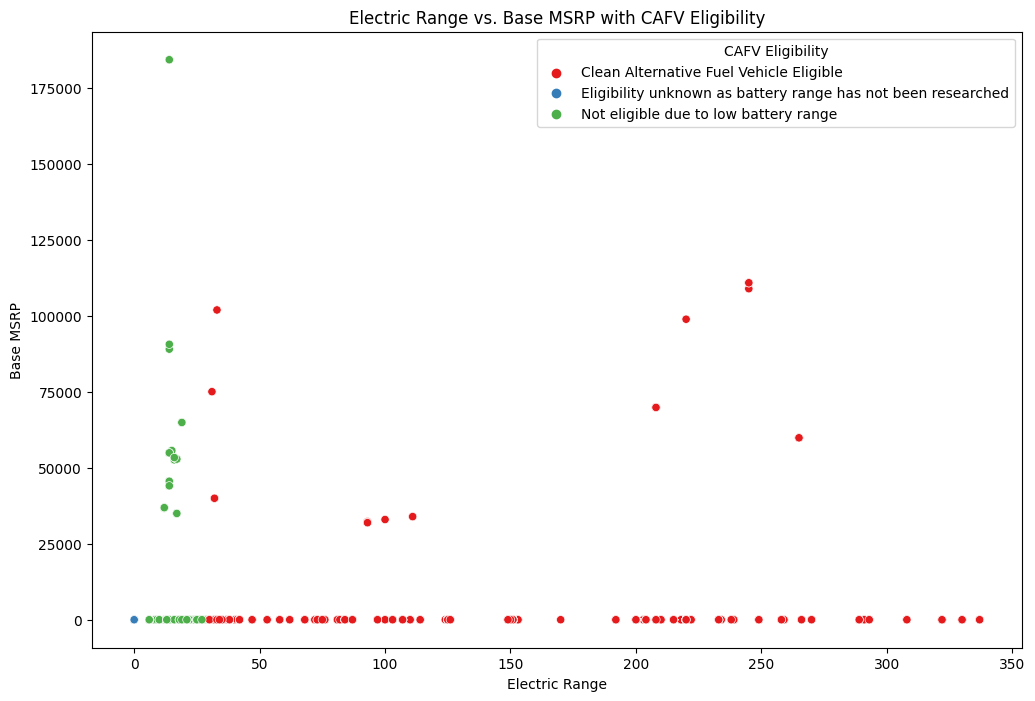

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows with missing values in key columns
ev_data_filtered = ev_data.dropna(subset=['Electric Range', 'Base MSRP', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

# Scatter plot with color-coded points based on 'CAFV Eligibility'
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Electric Range', y='Base MSRP', hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', data=ev_data_filtered, palette='Set1')
plt.title('Electric Range vs. Base MSRP with CAFV Eligibility')
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.legend(title='CAFV Eligibility')
plt.show()


In [22]:
!pip install geopandas

In [25]:
import plotly.express as px

# Filter out rows with missing values in key columns
ev_data_filtered = ev_data.dropna(subset=['Electric Range', 'Base MSRP', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

# Create an interactive scatter plot on a world map
fig = px.scatter_geo(ev_data_filtered,
                     lat='Electric Range',
                     lon='Base MSRP',
                     color='Clean Alternative Fuel Vehicle (CAFV) Eligibility',
                     hover_name='Clean Alternative Fuel Vehicle (CAFV) Eligibility',
                     projection="natural earth")

# Customize the layout
fig.update_geos(showcoastlines=True, coastlinecolor="black", showland=True, landcolor="white")
fig.update_layout(title='Electric Vehicle Distribution on World Map',
                  geo=dict(projection_scale=5),
                  coloraxis_colorbar=dict(title='CAFV Eligibility'))

# Show the plot
fig.show()


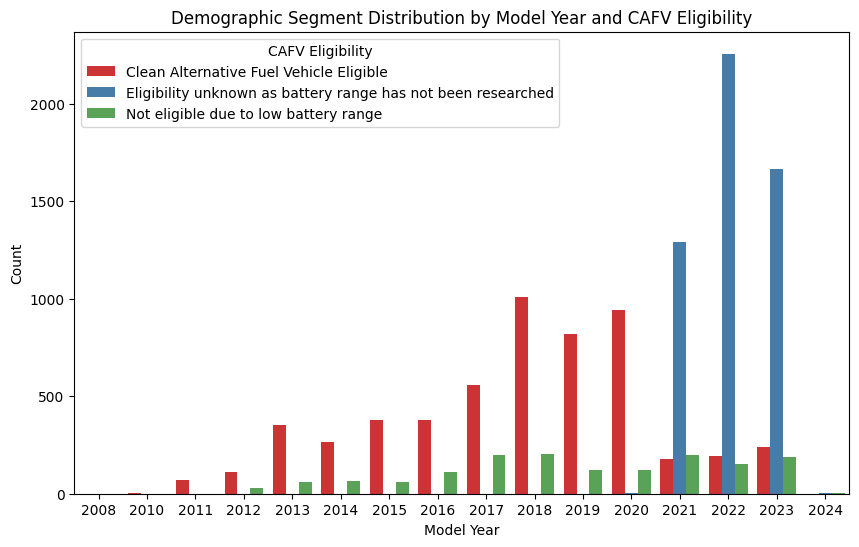

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out rows with missing values in key columns
ev_data_filtered = ev_data.dropna(subset=['Model Year', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

# Create a count plot for demographic segmentation by 'Model Year' and 'CAFV Eligibility'
plt.figure(figsize=(10, 6))
sns.countplot(x='Model Year', data=ev_data_filtered, hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', palette='Set1')
plt.title('Demographic Segment Distribution by Model Year and CAFV Eligibility')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.legend(title='CAFV Eligibility')
plt.show()


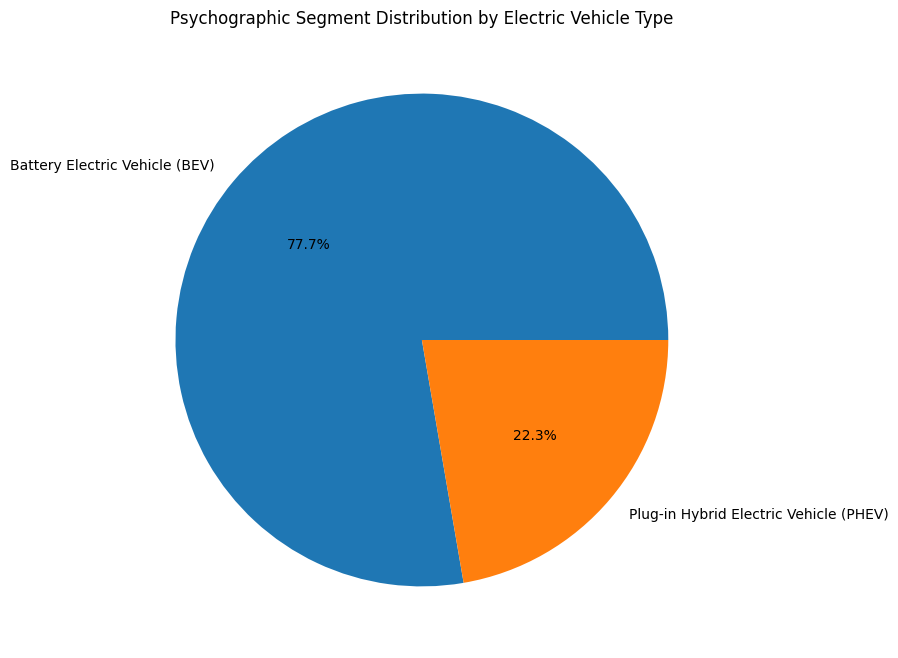

In [27]:
import matplotlib.pyplot as plt

# Filter out rows with missing values in key columns
ev_data_filtered = ev_data.dropna(subset=['Electric Vehicle Type'])

# Create a pie chart for psychographic segmentation by 'Electric Vehicle Type'
plt.figure(figsize=(8, 8))
ev_data_filtered['Electric Vehicle Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Psychographic Segment Distribution by Electric Vehicle Type')
plt.ylabel('')
plt.show()
